In [1]:
%load_ext autoreload
%autoreload 2

In [53]:
%matplotlib notebook
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils.mri_viewer import MRIViewer, MRIViewerOne
from utils.data_utils import im_path_to_arr
from utils.data_utils import resize_data_to_original_size
from utils.dataset_v3 import load_data_tcga

import pydicom
from tqdm import tqdm_notebook

##### Cheking for number of dicoms per folder

In [69]:
data_dirs = ['/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR',
             '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR 2of2']

# get the raw names of the folders to classify
all_counts = []
all_files_path = []
all_patients = []

bar = tqdm_notebook(total=sum([len(os.listdir(data_dir)) for data_dir in data_dirs]))
for data_dir in data_dirs:
    for study in os.listdir(data_dir):
        if 'Studies' in study:
            study_path = os.path.join(data_dir, study)
            for filename in tqdm_notebook(os.listdir(study_path)):
                filename_path = os.path.join(study_path, filename)
                # exclude folders with no dicoms
                listdir = os.listdir(filename_path)
                dcm_count = len([t for t in listdir if t[-4:] == ".dcm"])
                if dcm_count > 0:
                    patients_set = set()
                    for t in listdir:
                        if t[-4:] == '.dcm':
                            patient_name = pydicom.read_file(os.path.join(filename_path, t))[("0010", "0010")].value
                            patients_set.add(patient_name.decode())
                    all_counts.append(dcm_count)
                    all_files_path.append(filename_path)
                    all_patients.append(patients_set)
        bar.update(1)

KeyboardInterrupt: 

In [103]:
l = []
for c, f in zip(all_counts, all_files_path):
    l.append({'file_path': f, 'dcm_count': c})

In [110]:
import pandas as pd
df = pd.DataFrame(l)
df = df.sort_values("dcm_count", ascending=False)
df.head()

dcm_count                                          file_path
1671       2244  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
1934       1920  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
1585       1550  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
7408       1500  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
4382       1470  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...

In [121]:
df

dcm_count                                          file_path
1671       2244  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
1934       1920  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
1585       1550  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
7408       1500  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
4382       1470  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
4464       1469  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
7061       1450  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
4726       1440  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
4408       1408  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
5237       1349  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
79         1248  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
2693       1248  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
5060       1200  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
6651       1139  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
1930       1120  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
6430       1073  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
52         1056  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
8626       1020  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
6435       1020  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
2478        950  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3054        950  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
8027        920  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
7077        914  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
1509        882  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3324        872  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
4809        868  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
1550        858  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
7051        840  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
4645        806  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
4915        806  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
...         ...                                                ...
3537          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
6730          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3535          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3533          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3542          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3532          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3463          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3444          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3440          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3320          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3319          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3541          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3543          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3634          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3574          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
7761          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
7762          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3602          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3598          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3596          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3575          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3573          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3544          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3572          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3571          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
3570          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
7789          1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...
7790          1  /labs/gevaertlab/users/hackhack/RTOG

In [120]:
(df.dcm_count > 100).mean()

0.06364762870339079

In [111]:
df.iloc[0].file_path

'/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-12__Studies/236^7723^825_236_MR_2009-12-29_222227_MRI.BRAIN.W.MRA.WWO_DTI.high.iso.E_n2244__00000'

##### Working on one DICOM folder

In [2]:
dcm_path = "/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2011-05__Studies/100^134^825_100_MR_2011-05-03_132343_BRAIN.W.WO.CONT-MMR_T1.MTC_n48__00000"

In [3]:
list_dir = sorted(os.listdir(dcm_path))
n_slices = len(list_dir)
slices = []
for s in range(n_slices):
    ex = list_dir[s]
    if ex[-4:] == ".dcm":
        sample = pydicom.read_file(os.path.join(dcm_path, ex))
        print(sample[("0008", "0021")])
        print(sample[("0010", "0010")])
        
        slices.append(np.expand_dims(sample.pixel_array, 0))
mri = np.concatenate(slices, axis=0)
mri.shape

(0008, 0021) Series Date                         DA: '20110503'
(0010, 0010) Patient's Name                      PN: '100^134^825^^'
(0008, 0021) Series Date                         DA: '20110503'
(0010, 0010) Patient's Name                      PN: '100^134^825^^'
(0008, 0021) Series Date                         DA: '20110503'
(0010, 0010) Patient's Name                      PN: '100^134^825^^'
(0008, 0021) Series Date                         DA: '20110503'
(0010, 0010) Patient's Name                      PN: '100^134^825^^'
(0008, 0021) Series Date                         DA: '20110503'
(0010, 0010) Patient's Name                      PN: '100^134^825^^'
(0008, 0021) Series Date                         DA: '20110503'
(0010, 0010) Patient's Name                      PN: '100^134^825^^'
(0008, 0021) Series Date                         DA: '20110503'
(0010, 0010) Patient's Name                      PN: '100^134^825^^'
(0008, 0021) Series Date                         DA: '20110503'
(0010

(48, 256, 256)

In [4]:
sample0

NameError: name 'sample0' is not defined

In [7]:
os.path.join(dcm_path, list_dir[0])

'/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2011-05__Studies/100^134^825_100_MR_2011-05-03_132343_BRAIN.W.WO.CONT-MMR_T1.MTC_n48__00000/1.2.840.114158.801455302842.20170709151534000.1.3.1789583.dcm'

In [5]:
sample0 = pydicom.read_file(os.path.join(dcm_path, list_dir[0]))
sample1 = pydicom.read_file(os.path.join(dcm_path, list_dir[1]))
sample_1 = pydicom.read_file(os.path.join(dcm_path, list_dir[-3]))

In [38]:
dcm_path

'/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2011-05__Studies/100^134^825_100_MR_2011-05-03_132343_BRAIN.W.WO.CONT-MMR_T1.MTC_n48__00000'

In [124]:
list_dir

['1.2.840.114158.801455302842.20170709151534000.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541584.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541759.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541936.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541937.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541938.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541939.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542942.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542943.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542944.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542945.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542946.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542947.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542948.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542950.1.3.1789583.dcm',
 '1.2.840.

In [182]:
print(sample0[("0020", "000D")])
print(sample0[("0008", "0008")])

(0020, 000d) Study Instance UID                  UI: 1.2.840.113696.321976.500.1244234.2011050209050
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'M_SE', 'M', 'SE']


In [183]:
print(sample1[("0020", "000D")])
print(sample1[("0008", "0008")])

(0020, 000d) Study Instance UID                  UI: 1.2.840.113696.321976.500.1244234.2011050209050
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'M_SE', 'M', 'SE']


In [184]:
print(sample_1[("0020", "000D")])
print(sample_1[("0008", "0008")])

(0020, 000d) Study Instance UID                  UI: 1.2.840.113696.321976.500.1244234.2011050209050
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']


In [188]:
for k in sample0:
    if 'SeriesDate' == k.keyword:
        print(sample0[k.tag])
        print(sample1[k.tag])
        print(sample_1[k.tag])

(0008, 0021) Series Date                         DA: '20110503'
(0008, 0021) Series Date                         DA: '20110503'
(0008, 0021) Series Date                         DA: '20110503'


In [9]:
for k in sample0:
    try:
        if sample0[k.tag].value != sample1[k.tag].value:
            if k.keyword != "PixelData":
                print(">>>", k.keyword, k.tag, "\n", sample0[k.tag].value, "\n\n", sample1[k.tag].value, "\n")
    except KeyError:
        print("KeyError", k.keyword, k.tag)


>>> SOPInstanceUID (0008, 0018) 
 1.2.840.114158.801455302842.20170709151534000.1.3.1789583 

 1.2.840.114158.801455302842.20170709151541584.1.3.1789583 

>>> ReferencedPerformedProcedureStepSequence (0008, 1111) 
 [(0008, 0012) Instance Creation Date              DA: '20110503'
(0008, 0013) Instance Creation Time              TM: '140431'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.8027.5
(0008, 1150) Referenced SOP Class UID            UI: Modality Performed Procedure Step SOP Class
(0008, 1155) Referenced SOP Instance UID         UI: 1.3.46.670589.11.8027.5.0.2928.2011050313234318549
(0020, 0013) Instance Number                     IS: '0'
(2005, 0014) Private Creator                     LO: 'Philips MR Imaging DD 005'
(2005, 1406) [Unknown]                           SS: 0] 

 [(0008, 0012) Instance Creation Date              DA: '20110503'
(0008, 0013) Instance Creation Time              TM: '140431'
(0008, 0014) Instance Creator UID                UI: 1.3

In [6]:
list_dir

['1.2.840.114158.801455302842.20170709151534000.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541584.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541759.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541936.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541937.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541938.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151541939.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542942.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542943.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542944.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542945.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542946.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542947.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542948.1.3.1789583.dcm',
 '1.2.840.114158.801455302842.20170709151542950.1.3.1789583.dcm',
 '1.2.840.

<IPython.core.display.Javascript object>


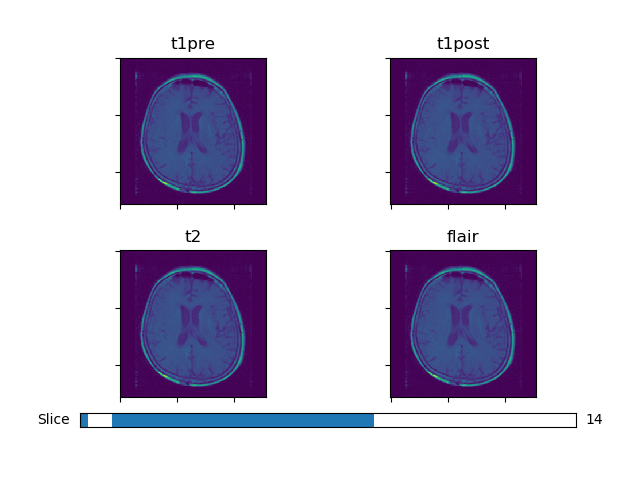

In [137]:
m = np.concatenate([mri[12:24, ...], mri[:12, ...]], axis=0)
MRIViewer(m, m, m, m, cmap=None, 
          title1='t1pre', title2='t1post', title3='t2', title4='flair')

In [147]:
(mri[24, ...] - mri[0, ...] == 0).mean()

0.292572021484375

In [143]:
mri[24:, ...] - mri[:24, ...]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

<IPython.core.display.Javascript object>


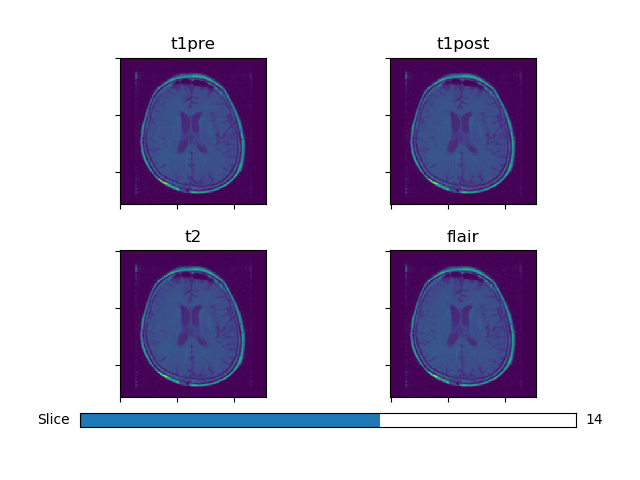

In [140]:
mri2 = mri[24:, ...]
m = np.concatenate([mri2[12:24, ...], mri2[:12, ...]], axis=0)
MRIViewer(m, m, m, m, cmap=None, 
          title1='t1pre', title2='t1post', title3='t2', title4='flair')

In [161]:
mrifloat = mri.astype(np.float32)

In [173]:
for i in range(24):
    print((np.abs(mrifloat[[0 + i], ...] -  mrifloat[[24 + i], ...])).mean())

2.233429
2.2628784
2.2365723
2.197754
2.1894379
2.1420288
2.1079254
2.117279
2.1068573
2.1112213
2.0354767
2.0254211
2.29747
2.264389
2.304718
2.350006
2.387741
2.3463135
2.350891
2.2983093
2.3174286
2.2944946
2.2696686
2.248169


In [169]:
mrifloat[[0], ...].mean()

123.61525

In [158]:
mri[[24], ...].min()

0

<IPython.core.display.Javascript object>


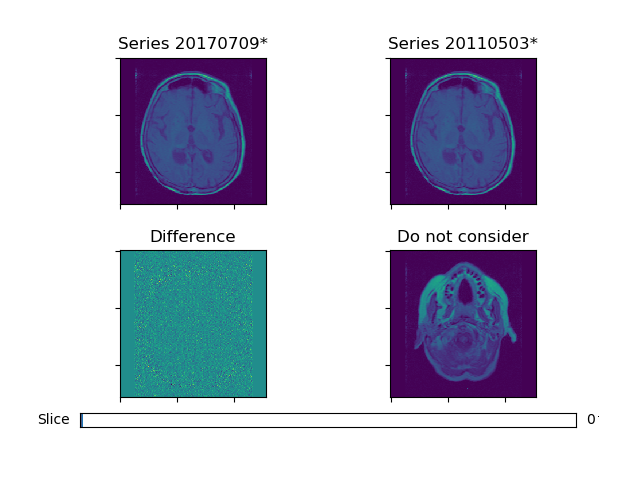

In [186]:
MRIViewer(mrifloat[:24, ...], mrifloat[24:, ...], mrifloat[:24, ...] -  mrifloat[24:, ...], m, cmap=None, 
          title1='Series 20170709*', title2='Series 20110503*', title3='Difference', title4='Do not consider')

### Investigate unique PatientIDs

In [93]:
study_dirs = [[os.path.join(data_dir, study_dir) for study_dir in os.listdir(data_dir)[:-1]] 
              for data_dir in data_dirs]
study_dirs = sum(study_dirs, [])

dicom_dirs = [[os.path.join(study_dir, dicom_dir) for dicom_dir in os.listdir(study_dir)] 
              for study_dir in study_dirs]
dicom_dirs = sum(dicom_dirs, [])

['/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/0101-01__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/1899-12__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2004-03__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2008-02__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-04__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-05__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-06__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-07__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-08__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-09__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2009-10__Studies',
 '/labs/gevaertlab/users/hackhack/RTOG/RTOG

In [101]:
data_dirs = ['/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR',
             '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR 2of2']

all_foldername_patients = set()
all_dcm_patients = set()

bar = tqdm_notebook(total=len(dicom_dirs))
for data_dir in data_dirs:
    for study in os.listdir(data_dir):
        if 'Studies' in study:
            study_path = os.path.join(data_dir, study)
            dcm_folders = os.listdir(study_path)
            for filename in dcm_folders:
                probablePatientID = filename.split("^")[0]
                filename_path = os.path.join(study_path, filename)
                
                listdir = os.listdir(filename_path)
                dcm_count = len([t for t in listdir if t[-4:] == ".dcm"])
                
                # exclude folders with no dicoms
                if dcm_count > 0:
                    #first_dcm_file_path = os.path.join(filename_path, [t for t in listdir if t[-4:] == ".dcm"][0])
                    #patientID = pydicom.read_file(first_dcm_file_path, specific_tags=['PatientID']).PatientID
                    all_foldername_patients.add(probablePatientID)
                    all_dcm_patients.add(patientID)
                bar.update(1)

print(all_foldername_patients)


{'881', '149', '718', '246', '717', '396', '187', '616', '150', '765', '708', '948', '79', '345', '755', '832', '251', '515', '840', '446', '447', '347', '770', '876', '866', '500', '935', '120', '837', '918', '791', '553', '343', '619', '675', '438', '640', '543', '523', '662', '818', '24', '574', '545', '694', '903', '249', '146', '963', '175', '618', '388', '27', '707', '725', '634', '66', '926', '50', '303', '81', '473', '594', '417', '794', '384', '199', '526', '977', '213', '193', '405', '481', '274', '110', '541', '116', '477', '457', '738', '433', '462', '504', '418', '77', '520', '403', '5', '490', '326', '758', '956', '160', '370', '649', '776', '228', '382', '453', '896', '856', '914', '7', '286', '134', '496', '13', '335', '312', '726', '712', '547', '793', '204', '601', '842', '21', '647', '722', '491', '411', '750', '277', '786', '3', '465', '142', '595', '885', '550', '190', '561', '248', '240', '107', '10', '222', '537', '610', '825', '431', '235', '123', '635', '622',

In [104]:
print(len(all_foldername_patients))
print(sorted([int(t) for t in all_foldername_patients]))

540
[3, 4, 5, 6, 7, 9, 10, 13, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 29, 42, 43, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 56, 61, 62, 63, 65, 66, 67, 68, 71, 75, 77, 79, 81, 84, 85, 88, 89, 90, 91, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 125, 129, 130, 132, 133, 134, 135, 137, 138, 141, 142, 144, 145, 146, 149, 150, 151, 153, 156, 158, 160, 161, 162, 167, 168, 170, 173, 174, 175, 177, 179, 180, 183, 184, 187, 190, 193, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 208, 213, 215, 216, 218, 220, 221, 222, 224, 226, 228, 230, 231, 232, 233, 235, 236, 240, 241, 244, 245, 246, 247, 248, 249, 251, 255, 257, 258, 259, 260, 261, 262, 266, 267, 269, 273, 274, 275, 276, 277, 286, 288, 289, 293, 295, 299, 303, 304, 306, 307, 308, 312, 314, 316, 318, 326, 329, 331, 332, 333, 335, 336, 338, 339, 340, 341, 342, 343, 344, 345, 347, 348, 351, 352, 355, 358, 360, 366, 367, 369, 370, 371, 373, 374, 375, 376, 380, 381, 382, 38

### Investigating ORIGINAL/DERIVED fields in .dcm folders

In [48]:
def analyze_orignals(dcm_path):
    print("Folder ", dcm_path.split("/")[-1])
    dicoms = os.listdir(dcm_path)
    dicoms = [dic.strip() for dic in dicoms if dic.strip()[-4:] == '.dcm']
    dicoms = [os.path.join(dcm_path, dic) for dic in dicoms]
    nb_dicoms = len(dicoms)
    
    nb_dicoms_original = 0
    patientIDs = []
    modality = None
    stack_ids = []
    for dic in dicoms:
        sample = pydicom.read_file(dic, specific_tags=['ImageType', 'PatientID', 'InstanceNumber'])
        patientIDs.append(sample.PatientID)
        
        if "ORIGINAL" in sample[("0008", "0008")].value:
            stack_ids.append(int(sample.InstanceNumber))
            nb_dicoms_original += 1

    if set(stack_ids) != set(range(1, nb_dicoms_original + 1)):
        print("\tFound slices indices", sorted(stack_ids))
    print("\tTotal of {} .dcm in folder.".format(nb_dicoms))
    print("\tTotal of {} ORIGINAL .dcm in folder.".format(nb_dicoms_original))
    print("\tFound {} unique PatientIDs in folder: {}".format(len(np.unique(patientIDs)), np.unique(patientIDs)))
    print()
    return nb_dicoms, nb_dicoms_original, np.unique(patientIDs)

In [77]:
data_dirs = ['/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR',
             '/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR 2of2']

# get the raw names of the folders to classify
all_counts = []
all_counts_original = []
all_files_path = []
all_patients = []

i = 0

bar = tqdm_notebook(total=sum([len(os.listdir(data_dir)) for data_dir in data_dirs]))
for data_dir in data_dirs:
    for study in os.listdir(data_dir):
        if 'Studies' in study:
            study_path = os.path.join(data_dir, study)
            dcm_folders = os.listdir(study_path)
            for filename in dcm_folders:
                filename_path = os.path.join(study_path, filename)
                # exclude folders with no dicoms
                i += 1
                listdir = os.listdir(filename_path)
                dcm_count = len([t for t in listdir if t[-4:] == ".dcm"])
                if dcm_count > 0:
                    nb_dicoms, nb_dicoms_original, patientIDs = analyze_orignals(filename_path)
                    all_counts.append(nb_dicoms)
                    all_counts_original.append(nb_dicoms_original)
                    all_files_path.append(filename_path)
                    all_patients.append(patientIDs)
                if i > 1000:
                    assert(1 == 0)
        bar.update(1)


Folder  727^1027^825_727_MR_0101-01-01_063719_BRAIN.W.WO.CM.MRI_3.PLANE.LOC_n15__00000
	Total of 15 .dcm in folder.
	Total of 15 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['727']

Folder  727^1027^825_727_MR_0101-01-01_063719_BRAIN.W.WO.CM.MRI_AXIAL.SPGR-BRAIN.LAB_n124__00000
	Total of 124 .dcm in folder.
	Total of 124 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['727']

Folder  727^1027^825_727_MR_0101-01-01_063719_BRAIN.W.WO.CM.MRI_AXIAL.SPGR-BRAIN.LAB_n124__00001
	Total of 124 .dcm in folder.
	Total of 124 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['727']

Folder  727^1027^825_727_MR_0101-01-01_063719_BRAIN.W.WO.CM.MRI_DTI.25.directions.1000b_n338__00000

	Found slices indices [51, 52, 53, 54, 55, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,

	Total of 24 .dcm in folder.
	Total of 24 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['874']

Folder  874^8061^825_874_MR_0101-01-01_092717_BRAIN.W.WO.CM.MRI_Apparent.Diffusion.Coefficient.(mm..s)_n24__00000
	Total of 24 .dcm in folder.
	Total of 0 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['874']

Folder  874^8061^825_874_MR_0101-01-01_092717_BRAIN.W.WO.CM.MRI_AXIAL.FLAIR_n11__00000
	Found slices indices [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
	Total of 11 .dcm in folder.
	Total of 11 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['874']

Folder  874^8061^825_874_MR_0101-01-01_092717_BRAIN.W.WO.CM.MRI_AXIAL.T1.Pre.GAD_n24__00000
	Total of 24 .dcm in folder.
	Total of 24 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['874']

Folder  874^8061^825_874_MR_0101-01-01_131318_BRAIN.W.WO.CM.MRI_Apparent.Diffusion.Coefficient.(mm..s)_n22__00000
	Total of 22 .dcm in folder.
	Total of 0 ORIGINAL .dcm in folder.
	Found 1

	Found slices indices [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
	Total of 22 .dcm in folder.
	Total of 22 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['204']

Folder  204^7870^825_204_MR_1899-12-30_094606_._COR.T2.FSE-XL.FS_n51__00000
	Total of 51 .dcm in folder.
	Total of 51 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['204']

Folder  204^7870^825_204_MR_1899-12-30_094606_._Processed.Images_n117__00000
	Total of 117 .dcm in folder.
	Total of 0 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['204']

Folder  204^7870^825_204_MR_1899-12-30_094606_._Processed.Images_n90__00000
	Total of 90 .dcm in folder.
	Total of 0 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['204']

Folder  204^7870^825_204_MR_1899-12-30_094606_._SAG.T1.FLAIR_n8__00000
	Found slices indices [12, 13, 14, 15, 16, 17, 18, 19]
	Total of 8 .dcm in folder.
	Total of 8 ORIGINAL .dcm in folder.
	Found 1 unique Patient

	Total of 26 .dcm in folder.
	Total of 0 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['295']

Folder  295^2403^825_295_MR_1899-12-30_095058_._COR.T2.FSE.FS_n53__00000
	Total of 53 .dcm in folder.
	Total of 53 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['295']

Folder  295^2403^825_295_MR_1899-12-30_095058_._Ktrans.wAIF.over.AX.T1.MEMP.POST_n26__00000
	Total of 26 .dcm in folder.
	Total of 0 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['295']

Folder  295^2403^825_295_MR_1899-12-30_095058_._Reformatted_n139__00000
	Total of 139 .dcm in folder.
	Total of 0 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['295']

Folder  295^2403^825_295_MR_1899-12-30_095058_._Reformatted_n37__00000
	Total of 37 .dcm in folder.
	Total of 0 ORIGINAL .dcm in folder.
	Found 1 unique PatientIDs in folder: ['295']

Folder  295^2403^825_295_MR_1899-12-30_095058_._ROI.over.AX.T1.MEMP.POST_n26__00000
	Total of 26 .dcm in folder.
	Total of 0 

AssertionError: 

In [55]:
df = pd.DataFrame({"count_dcm": all_counts,
             "count_dcm_original": all_counts_original,
             "folder_path": all_files_path,
             "patients": all_patients})
df.head()

count_dcm  count_dcm_original  \
0         15                  15   
1        124                 124   
2        124                 124   
3        338                 338   
4         11                   0   

                                         folder_path patients  
0  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
2  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
3  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
4  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]

In [73]:
df

count_dcm  count_dcm_original  \
0          15                  15   
1         124                 124   
2         124                 124   
3         338                 338   
4          11                   0   
5          15                  15   
6          23                   0   
7          86                  86   
8          26                  26   
9          23                  23   
10         26                  26   
11         26                  26   
12         28                  28   
13         28                  28   
14         46                  46   
15         26                  26   
16         20                  20   
17         20                  20   
18         15                  15   
19         15                  15   
20         15                  15   
21         22                   0   
22         25                  25   
23         22                  22   
24         25                  25   
25         25                  25   
26         27                  27   
27         44                  44   
28         25                  25   
29         21                  21   
30         21                  21   
31         15                  15   
32         25                  25   
33         24                  24   
34         24                   0   
35         11                  11   
36         24                  24   
37         22                   0   
38         22                  22   
39         44                  44   
40         25                  25   
41         25                  25   
42         50                  50   
43         25                  25   
44         25                  25   
45         24                  24   
46         19                  19   
47        120                 120   

                                          folder_path patients  
0   /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
1   /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
2   /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
3   /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
4   /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
5   /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
6   /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
7   /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
8   /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
9   /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
10  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
11  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
12  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
13  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
14  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
15  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
16  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
17  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
18  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
19  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
20  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
21  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
22  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
23  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
24  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
25  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
26  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
27  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
28  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
29  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
30  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [727]  
31  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...    [874]  
32  /labs/gevaertlab/users/hackhack/RTOG/RTOG

In [74]:
dcm_path3 = df.iloc[14].folder_path

### Visualizing ORIGINALs in dcm folder.

In [67]:
def create_modality_file(dcm_path):
    dicoms = os.listdir(dcm_path)
    dicoms = [dic.strip() for dic in dicoms if dic.strip()[-4:] == '.dcm']
    dicoms = [os.path.join(dcm_path, dic) for dic in dicoms]
    nb_dicoms = len(dicoms)
    
    nb_dicoms_original = 0
    patientIDs = []
    modality = None
    for dic in dicoms:
        sample = pydicom.read_file(dic)
        patientIDs.append(sample.PatientID)
        
        if "ORIGINAL" in sample[("0008", "0008")].value:
            arr = sample.pixel_array
            stack_id = int(sample.InstanceNumber) - 1
            if modality is None:
                shape = [nb_dicoms] + list(arr.shape)
                modality = np.zeros(shape)
            modality[stack_id, :, :] = arr
            nb_dicoms_original += 1
    
    print("Total of {} .dcm in folder.".format(nb_dicoms))
    print("Total of {} original .dcm in folder.".format(nb_dicoms))
    print("Found {} unique PatientIDs in folder: {}".format(len(np.unique(patientIDs)), np.unique(patientIDs)))
    print("Images size is {}".format(arr.shape))
    return modality[:nb_dicoms_original, ...], np.unique(patientIDs)

In [107]:
multiple_mod_images_fields = pd.read_csv("rtog/images_unclassified_multiple_modalities.csv")
multiple_mod_images_fields.head()

Unnamed: 0     patient_id                  description  \
0           0  106^801^825^^          AX T2 Propeller fat   
1           1  106^801^825^^       ax flair blade -motion   
2           2  106^801^825^^  AX T1 MPRAGE POST-iso voxel   
3           3  106^801^825^^   AX T1 MPRAGE PRE-iso voxel   
4           4  106^801^825^^        ax t2 fs blade-motion   

                                            raw_path  
0  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...  
1  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...  
2  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...  
3  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...  
4  /labs/gevaertlab/users/hackhack/RTOG/RTOG_dupl...

In [108]:
dcm_path4 = multiple_mod_images_fields.iloc[0].raw_path

In [9]:
dcm_path = "/labs/gevaertlab/users/hackhack/RTOG/RTOG_duplicate/0825-6686 DAR/2011-05__Studies/100^134^825_100_MR_2011-05-03_132343_BRAIN.W.WO.CONT-MMR_T1.MTC_n48__00000"
dcm_path2 = "/labs/gevaertlab/users/hackhack/RTOG/scratch/2004-03__Studies/125^126^825_125_MR_2004-03-18_150758_MR.BRAIN.MRI.W.WO.CONTRAST_AXIAL.FLAIR_n25__00000"

In [109]:
a, p = create_modality_file(dcm_path4)
print("Complete Original image shape:", a.shape)
print("PatientIDs in folder:", p)

Total of 40 .dcm in folder.
Total of 40 original .dcm in folder.
Found 1 unique PatientIDs in folder: ['106']
Images size is (512, 512)
Complete Original image shape: (40, 512, 512)
PatientIDs in folder: ['106']


In [68]:
def view(dcm_path):
    a, p = create_modality_file(dcm_path)
    MRIViewerOne(a, title1=p)

Total of 40 .dcm in folder.
Total of 40 original .dcm in folder.
Found 1 unique PatientIDs in folder: ['106']
Images size is (512, 512)


<IPython.core.display.Javascript object>


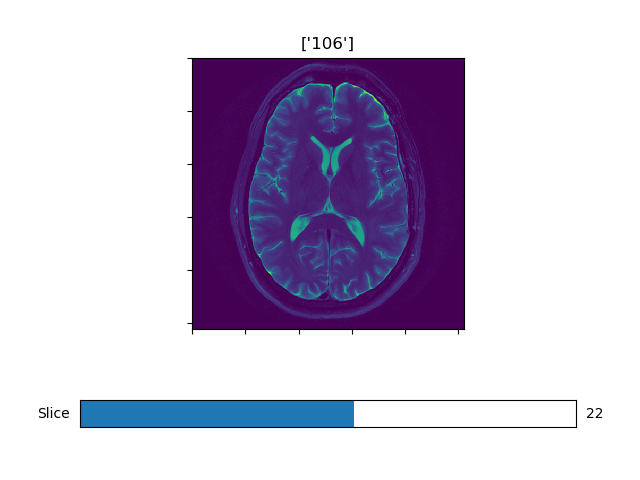

In [110]:
view(dcm_path4)